<center>
<h1>Biomed Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 3.4.5 | Anaconda 2.2.0 64-bit (https://anaconda.org/)<br>
</center>
<p><br>

# Introduction

Opioids is a small standard binary-class classification data set from the <a href="https://www.kaggle.com/apryor6/us-opiate-prescriptions">Kaggle Dataset Repository</a>, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the opioid_prescribers dataset from the repository.

In [2]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'Opioids'
!dir $datadir*

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 742C-BB3C

 R‚pertoire de C:\Users\Ho‰l\Documents\vrais documents\AIC\Biomed\Opioids\Starting_Kit

15/11/2017  17:05    <DIR>          sample_data
15/11/2017  16:53            11ÿ669 Sample_data.ipynb
               1 fichier(s)           11ÿ669 octets
               1 R‚p(s)  61ÿ382ÿ651ÿ904 octets libres


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from ingestion_program.data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname) 

TabError: inconsistent use of tabs and spaces in indentation (data_io.py, line 124)

In [7]:
data.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [8]:
data.describe() 

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.498162e+09,3.157160,2.370400,1.05368,7.041000,0.708440,8.962840,9.305720,16.12812,2.394840,...,2.18804,2.238160,2.551600,0.806240,19.198040,3.348240,4.070880,1.119440,11.573120,0.587520
std,2.877233e+08,20.755819,11.631601,6.66110,25.898648,5.224049,36.520987,29.375476,69.35317,14.266314,...,10.08554,13.325884,23.327117,4.951929,86.501125,17.127556,18.467437,10.299475,39.136616,0.492291
min,1.003002e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245473e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.497842e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.740406e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.992999e+09,770.000000,644.000000,356.00000,1105.000000,275.000000,2431.000000,790.000000,5716.00000,596.000000,...,528.00000,902.000000,1814.000000,143.000000,6029.000000,596.000000,772.000000,694.000000,2107.000000,1.000000


ERROR! Session/line number was not unique in database. History logging moved to new session 198


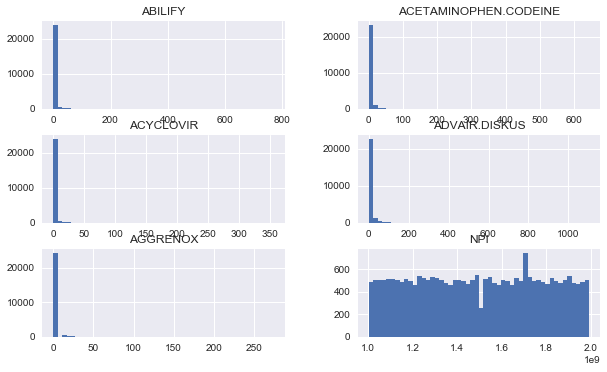

In [11]:
data[data.columns[:10]].hist(figsize=(10, 10), bins=50, layout=(5, 2)); 

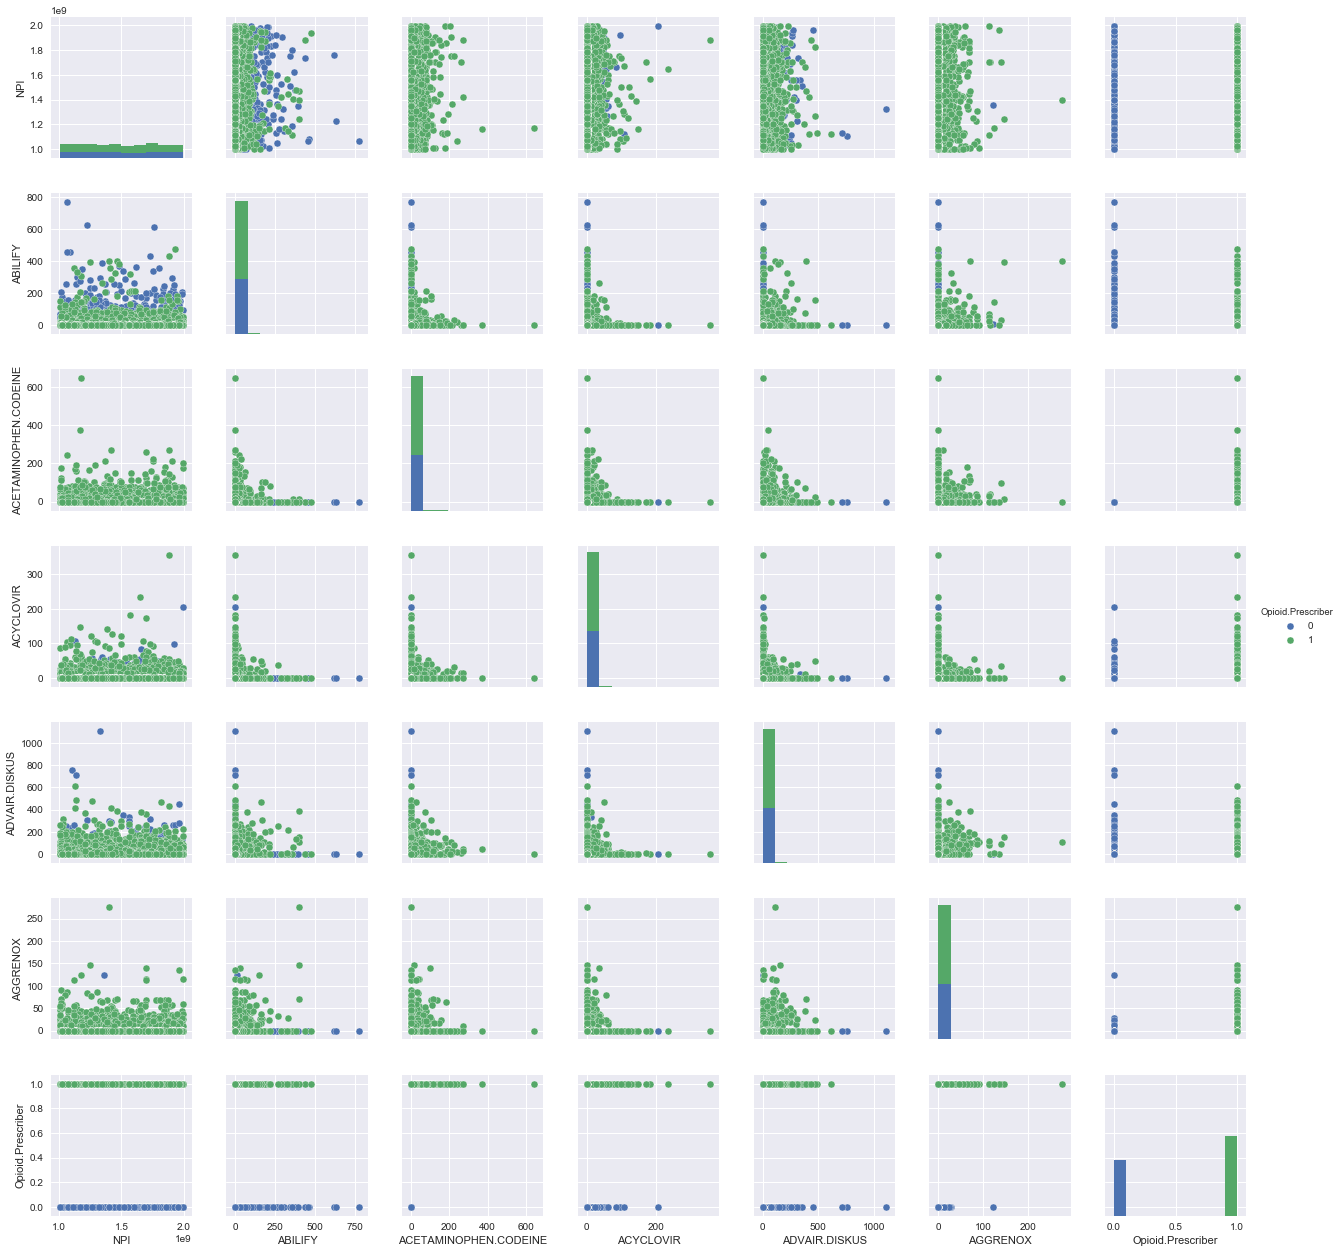

In [29]:
import numpy as np
cols = data.columns[:10]
sns.pairplot(data[np.append(cols,"Opioid.Prescriber")], hue="Opioid.Prescriber")

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [45]:
from ingestion_program.data_manager import DataManager     #What and where is this package?
D = DataManager(dataname, datadir, replace_missing=True)
print D

TabError: inconsistent use of tabs and spaces in indentation (data_manager.py, line 60)

## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [32]:
from model import model
??model 

ImportError: No module named 'model'

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [10]:
M = model()
trained_model_name = model_dir + dataname
M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

Train and run your predictive model. If you have saved a trained model in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete iris_model.pickle from sample_code_submission if you do not want this to happen.

In [11]:
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

FIT: dim(X)= [35, 4]
FIT: dim(y)= [35, 3]
PREDICT: dim(X)= [35, 4]
PREDICT: dim(y)= [35, 3]
PREDICT: dim(X)= [35, 4]
PREDICT: dim(y)= [35, 3]
PREDICT: dim(X)= [35, 4]
PREDICT: dim(y)= [35, 3]


Save the trained model (will be ready to reload next time around) and save the prediction results:

In [12]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/iris_test.predict
sample_result_submission/iris_train.predict
sample_result_submission/iris_valid.predict


## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.

In [46]:
from scoring_program import libscores

In [48]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
scoring_function = getattr(libscores, metric_name)
print('Using scoring metric:', metric_name)
??scoring_function

Using scoring metric: auc_score_


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [14]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Training score for the mse_metric metric = 0.3333
Ideal score for the mse_metric metric = 0.0000


Be careful: some metrics use one-hot encoding for multi-class classification problems, but other use class numbers. So you need to convert the target values and predicted values if you want to use those. This is the case of `scikit-learn` metrics.

In [15]:
# Convert targets and predictions for vectors of class numbers:
from data_converter import convert_to_num
y_train = convert_to_num(Y_train)
y_hat_train = convert_to_num(Y_hat_train)
# Compute accuracy and confusion matrix:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#print 'y_train     =' , y_train
#print 'y_hat_train =' , y_hat_train
print 'Training accuracy = %5.4f' % accuracy_score(y_train, y_hat_train)
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(y_train, y_hat_train)

	Converting to numeric vector
[ 1.  1.  2.  2.  1.  1.  0.  1.  2.  2.  2.  2.  2.  1.  2.  2.  1.  2.
  0.  0.  1.  1.  2.  0.  2.  1.  1.  2.  1.  2.  1.  1.  1.  1.  2.]
	Converting to numeric vector
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Training accuracy = 0.1143
Confusion matrix [known in lines, predicted in columns]=
[[ 4  0  0]
 [16  0  0]
 [15  0  0]]


### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.

In [16]:
from sklearn.cross_validation import StratifiedKFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
skf = StratifiedKFold(y_train, n_folds=n)
i=0
scores = zeros(n)
for idx_t, idx_v in skf:
    Xtr = X_train[idx_t]
    Ytr = Y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = Y_train[idx_v]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print 'Fold', i+1, 'example metric = ', scores[i]
    i=i+1
print 'Average score = ', mean(scores)

FIT: dim(X)= [22, 4]
FIT: dim(y)= [22, 3]
PREDICT: dim(X)= [13, 4]
PREDICT: dim(y)= [13, 3]
Fold 1 example metric =  0.333333333333
FIT: dim(X)= [24, 4]
FIT: dim(y)= [24, 3]
PREDICT: dim(X)= [11, 4]
PREDICT: dim(y)= [11, 3]
Fold 2 example metric =  0.333333333333
FIT: dim(X)= [24, 4]
FIT: dim(y)= [24, 3]
PREDICT: dim(X)= [11, 4]
PREDICT: dim(y)= [11, 3]
Fold 3 example metric =  0.333333333333
Average score =  0.333333333333


/Users/isabelleguyon/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [16]:
outdir = 'sample_result_submission'     

In [17]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

python: can't open file 'ingestion_program//ingestion.py': [Errno 2] No such file or directory


## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.